In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# Load the dataset

In [7]:
df = pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# Data Preprocessing

In [8]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Descriptive statistics

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Data Visualization

In [ ]:
# Univariate Analysis

<ipython-input-12-f5e4c62d6ee0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

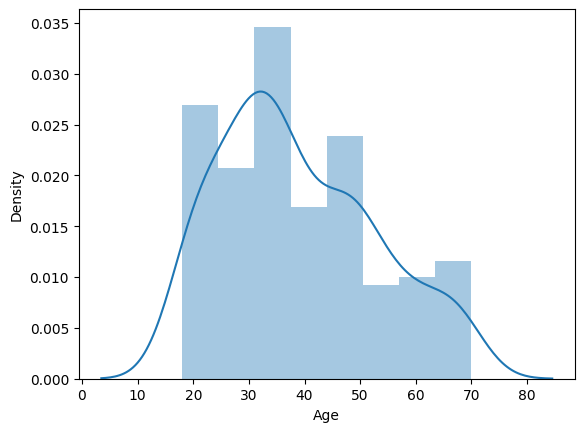

In [12]:
sb.distplot(df["Age"])

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

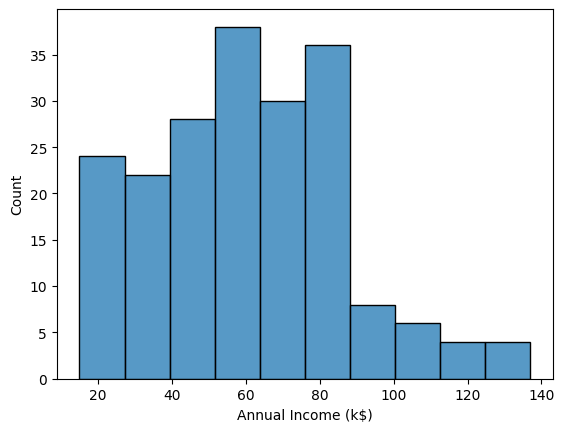

In [14]:
# histogram
sb.histplot(df["Annual Income (k$)"])

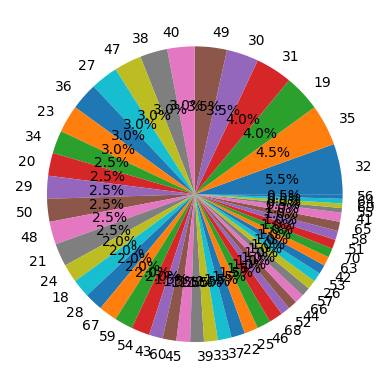

In [16]:
# pie chart

x = df['Age'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

<Axes: ylabel='count'>

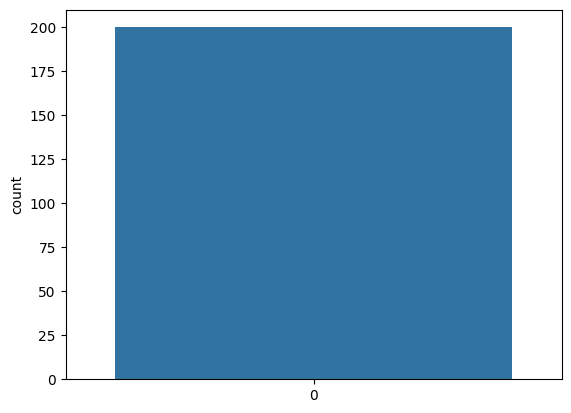

In [20]:
# Bar chart

sb.countplot(df["Annual Income (k$)"])

<Axes: ylabel='Spending Score (1-100)'>

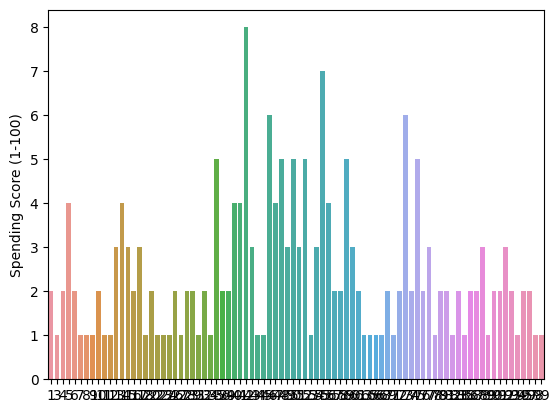

In [25]:
# bar plot
sb.barplot(x =df['Spending Score (1-100)'].value_counts().index,y =df['Spending Score (1-100)'].value_counts() )

<ipython-input-26-a4d6a5eb07b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


<Axes: >

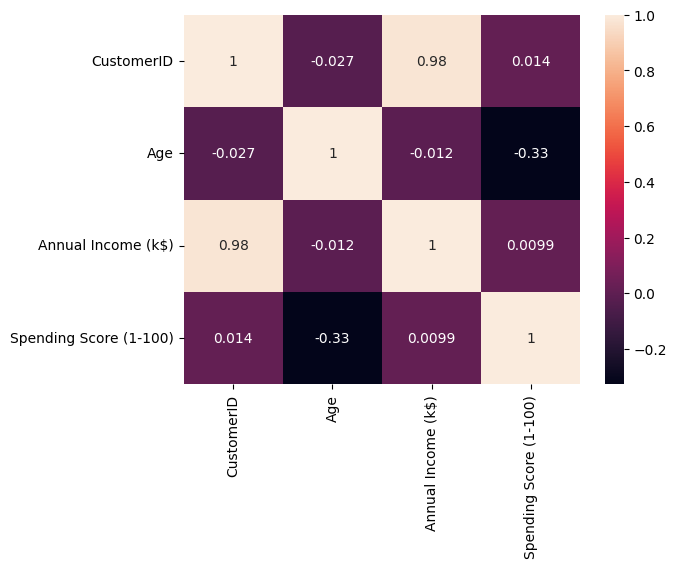

In [26]:
sb.heatmap(df.corr(), annot=True)

In [ ]:
# Outlier detection

<Axes: >

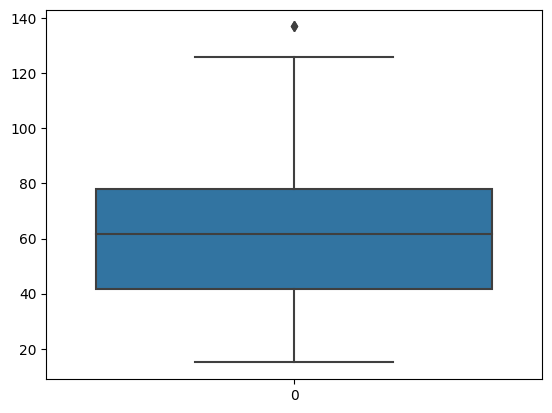

In [31]:
sb.boxplot(df['Annual Income (k$)'])

In [ ]:
# Outlier Removal

In [33]:
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)

In [34]:
print(q1)
print(q3)

41.5
78.0


In [35]:
IQR = q3  - q1
IQR

36.5

In [36]:
lower_limit = q1 - 1.5*IQR
lower_limit

-13.25

In [37]:
upper_limit = q3 + 1.5*IQR
upper_limit

132.75

In [38]:
df.median()

<ipython-input-38-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [40]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper_limit,132.75,df['Annual Income (k$)'])

<Axes: >

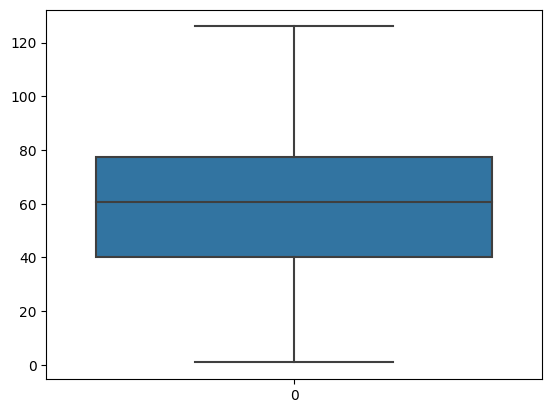

In [41]:
sb.boxplot(df['Annual Income (k$)'])

In [ ]:
# Label Encoding method

In [42]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [43]:
df.Gender = le.fit_transform(df.Gender)

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [ ]:
# Split the data into independent and dependent variables

In [69]:
#Extracting Independent variable
X = df.iloc[:, :-1].values

In [52]:
#Extracting Dependent variable
y = df.iloc[:, 4].values

In [53]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [54]:
y_train.shape

(140,)

In [55]:
X_train.shape

(140, 4)

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [59]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [60]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [61]:
from sklearn import cluster

In [75]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(X)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [76]:
error

[837870.0798,
 260395.49899189916,
 148467.3550649968,
 109092.68191102709,
 87178.1520294176,
 71995.48848444867,
 60367.61451203867,
 50955.95448060379,
 43133.919163307946,
 36779.54211288871]

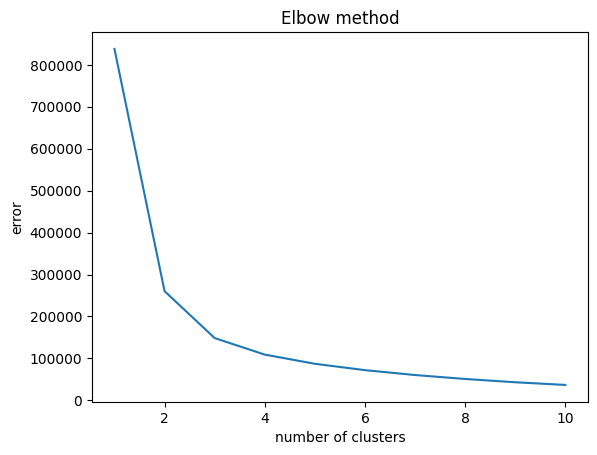

In [77]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [78]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [79]:
km_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [80]:
pred = km_model.predict(X)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [81]:
# Test the model with random observation

km_model.predict([[1.1,2.2,4.3,4.4]])

array([2], dtype=int32)

In [82]:
km_model.predict([[2.2,2.0,1.1,1.2]])

array([2], dtype=int32)